# Extracting Building Values from an API

In [1]:
import pandas as pd
import json
import requests 
import zipcodes
import http.client 
import matplotlib.pyplot as plt
from collections import defaultdict 

## [ATTOM API Docs](https://api.developer.attomdata.com/docs)

In [2]:
# Input the desired zipcode
while True: 
    zipinput = input("Enter a zip code value ")
    
    if zipcodes.is_real(zipinput):
        
        break
        
    else:
        print("Invalid zip code...re-enter zip code")


Enter a zip code value 78701


In [3]:
# Input the date of the desired valuations
while True:
    year = input("Enter the current year in 4 digits: ")
    if len(year)==4:
        year=int(year)
        break
    else:
        print("Invalid Year. Please Enter the Year as 4-digits.")
        
while True:
    month = input("Enter the current month in 2 digits: ")
    if len(month)==2:
        month=int(month)
        break
    else:
        print("Invalid Year. Please Enter a Zero before a 1-digit month.")
        
while True:
    day = input("Enter the current day in 2 digits: ")
    if len(day)==2:
        day=int(day)
        break
    else:
        print("Invalid Date. Please Enter a Zero before a 1-digit day.")


Enter the current year in 4 digits: 2020
Enter the current month in 2 digits: 02
Enter the current day in 2 digits: 17


In [4]:
# Pull data on property values from the previous year from the given date, from the ATTOM Data API
with open('../misc/api_keys/attom_a.txt') as f:
    key = f.read().strip()

conn = http.client.HTTPSConnection("api.gateway.attomdata.com") 
headers = { 
    'accept': "application/json", 
    'apikey': key
    } 
conn.request("GET",f"/propertyapi/v1.0.0/assessment/detail?geoid=ZI{zipinput}&startcalendardate={year-1}-{month}-{day}&endcalendardate={year}-{month}-{day}&page=1&pagesize=10000", headers=headers)

res = conn.getresponse() 
data = res.read() 

dict1 = json.loads(data.decode("utf-8"))

In [5]:
dict1['property'][0].keys()  #all the keys for the first property in the list

dict_keys(['identifier', 'lot', 'area', 'address', 'location', 'summary', 'utilities', 'building', 'vintage', 'assessment'])

In [6]:
pd.DataFrame(dict1['property'][0]) # the values for the first property in the list

,identifier,lot,area,address,location,summary,utilities,building,vintage,assessment
obPropId,32655390948201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fips,48201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apn,1394230010001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apnOrig,1394230010001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attomId,326553909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frontage,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lotsize1,NaN,1.853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lotsize2,NaN,80717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pooltype,NaN,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dict1['property'][0]['assessment']['assessed']

{'assdimprpersizeunit': 309.85,
 'assdimprvalue': 1420967,
 'assdlandpersizeunit': 10.0,
 'assdlandvalue': 807170,
 'assdttlpersizeunit': 485.86,
 'assdttlvalue': 2228137}

In [8]:
dict1['property'][0]['assessment']['appraised']

{'apprimprvalue': 0, 'apprlandvalue': 0, 'apprttlvalue': 0}

In [9]:
dict1['property'][0]['assessment']['calculations']

{'calcimprind': 'MARKET VALUE',
 'calcimprpersizeunit': 309.85,
 'calcimprvalue': 1420967,
 'calclandind': 'MARKET VALUE',
 'calclandpersizeunit': 27.6,
 'calclandvalue': 807170,
 'calcttlind': 'MARKET VALUE',
 'calcttlvalue': 2228137,
 'calcvaluepersizeunit': 485.86}

In [10]:
dict1['property'][0]['assessment']['market']

{'mktimprvalue': 1420967, 'mktlandvalue': 807170, 'mktttlvalue': 2228137}

In [11]:
df_property = pd.DataFrame({
    'zip_input': [zipinput for num in range((len(dict1['property'])))],
    'zipcode': [dict1['property'][num]['address']['postal1'] for num in range((len(dict1['property'])))],
    'state': [dict1['property'][num]['address']['countrySubd'] for num in range((len(dict1['property'])))],
    'address': [dict1['property'][num]['address']['line1'] for num in range((len(dict1['property'])))],
    'property_type': [dict1['property'][num]['summary']['proptype'] for num in range((len(dict1['property'])))],
    'property_code': [dict1['property'][num]['summary']['propIndicator'] for num in range((len(dict1['property'])))],
    'city': [dict1['property'][num]['address']['locality'] for num in range((len(dict1['property'])))],
    'latitude': [dict1['property'][num]['location']['latitude'] for num in range((len(dict1['property'])))],
    'longitude': [dict1['property'][num]['location']['longitude'] for num in range((len(dict1['property'])))],
    'sqft': [dict1['property'][num]['lot']['lotsize1'] for num in range((len(dict1['property'])))],
    'appraised_improved_value': [dict1['property'][num]['assessment']['appraised']['apprimprvalue'] for num in range((len(dict1['property'])))],
    'appraised_land_value': [dict1['property'][num]['assessment']['appraised']['apprlandvalue'] for num in range((len(dict1['property'])))],
    'appraised_total_value': [dict1['property'][num]['assessment']['appraised']['apprttlvalue'] for num in range((len(dict1['property'])))],
    'assessed_improved_value': [dict1['property'][num]['assessment']['assessed']['assdimprvalue'] for num in range((len(dict1['property'])))],
    'assessed_land_value': [dict1['property'][num]['assessment']['assessed']['assdlandvalue'] for num in range((len(dict1['property'])))],
    'assessed_total_value': [dict1['property'][num]['assessment']['assessed']['assdttlvalue'] for num in range((len(dict1['property'])))],
    'calculated_improved_value': [dict1['property'][num]['assessment']['calculations']['calcimprvalue'] for num in range((len(dict1['property'])))],
    'calculated_land_value': [dict1['property'][num]['assessment']['calculations']['calclandvalue'] for num in range((len(dict1['property'])))],
    'calculated_total_value': [dict1['property'][num]['assessment']['calculations']['calcttlvalue'] for num in range((len(dict1['property'])))],
    'market_value': [dict1['property'][num]['assessment']['market']['mktttlvalue'] for num in range((len(dict1['property'])))],
})

print(df_property.shape)
print(f'There are {df_property.shape[0]} properties found in the {zipinput} zipcode for the year preceding {month}/{day}/{year}.')
df_property.head()

(5333, 20)
There are 5333 properties found in the 78701 zipcode for the year preceding 2/17/2020.


,zip_input,zipcode,state,address,property_type,property_code,city,latitude,longitude,sqft,appraised_improved_value,appraised_land_value,appraised_total_value,assessed_improved_value,assessed_land_value,assessed_total_value,calculated_improved_value,calculated_land_value,calculated_total_value,market_value
0,78701,77037,TX,165 WEST RD,COMMON AREA,20,Houston,29.914477,-95.410726,1.8530,0,0,0,1420967,807170,2228137,1420967,807170,2228137,2228137
1,78701,78701,TX,20 N INTERSTATE 35,COMMON AREA,20,Austin,30.254712,-97.737192,1.9660,26501976,18498024,45000000,26501976,18498024,45000000,26501976,18498024,45000000,45000000
2,78701,78702,TX,57 SAN MARCOS ST,SFR,10,Austin,30.254824,-97.737072,0.0517,121021,78750,199771,121021,78750,199771,121021,78750,199771,199771
3,78701,78701,TX,30 N INTERSTATE 35,COMMON AREA,20,Austin,30.254892,-97.737236,0.6600,28319,2070072,2098391,28319,2070072,2098391,28319,2070072,2098391,2098391
4,78701,78701,TX,40 N INTERSTATE 35 # PB1,CONDOMINIUM,11,Austin,30.255156,-97.738014,0.0476,663019,246081,909100,663019,246081,909100,663019,246081,909100,909100


In [12]:
# Data Dictionary for property types
# """Property Type - Codes
# 10 Single Family Residence / Townhouse/
# 11 Condominium (residential)/
# 20 Commercial
# 21 Duplex, Triplex, Quadplex/
# 22 Apartment/
# 23 Hotel, Motel/
# 24 Commercial (condominium)
# 25 Retail/
# 27 Office Building/
# 28 Warehouse/
# 29 Financial Institution/
# 30 Hospital (medical complex, clinic)
# 50 Industrial/
# 51 Industrial Light/
# 52 Industrial Heavy/
# 54 Utilities
# 70 Agricultural/
# 80 Vacant/
# 90 Exempt"""


In [13]:
value_cols = list(df_property.columns[df_property.columns.str.contains('value')])
value_cols

['appraised_improved_value',
 'appraised_land_value',
 'appraised_total_value',
 'assessed_improved_value',
 'assessed_land_value',
 'assessed_total_value',
 'calculated_improved_value',
 'calculated_land_value',
 'calculated_total_value',
 'market_value']

In [14]:
final = {}
final['zipcode'] = 78701
final['count_property'] = df_property['address'].count()

for col in value_cols:
    final[f'sum_{col}'] = 0
    for value in df_property[col]:
#         print(value)
        final[f'sum_{col}'] += value
    final[f'avg_{col}'] = round(final[f'sum_{col}']/len(df_property[col]),2)
pd.DataFrame([final])

,zipcode,count_property,sum_appraised_improved_value,avg_appraised_improved_value,sum_appraised_land_value,avg_appraised_land_value,sum_appraised_total_value,avg_appraised_total_value,sum_assessed_improved_value,avg_assessed_improved_value,...,sum_assessed_total_value,avg_assessed_total_value,sum_calculated_improved_value,avg_calculated_improved_value,sum_calculated_land_value,avg_calculated_land_value,sum_calculated_total_value,avg_calculated_total_value,sum_market_value,avg_market_value
0,78701,5333,12674751703,2376664.49,6040000448,1132570.87,18714041458,3509102.09,12463415736,2337036.52,...,18687178435,3504064.96,12682762040,2378166.52,6042766418,1133089.52,18724767990,3511113.44,18724767990,3511113.44


In [15]:
def get_custom_describe(value_col, df_group=df_property.groupby(['property_type'])):
    return pd.DataFrame({
                        'count': df_group[value_col].count(),
                        'mean': df_group[value_col].mean().map('${:,.2f}'.format),
                        'std': df_group[value_col].std().map('${:,.2f}'.format),
                        'median_val': df_group[value_col].median().map('${:,.2f}'.format),
                        'min_val': df_group[value_col].min().map('${:,.2f}'.format),
#                         '25_percentile': df_group[value_col].quantile(.25).map('${:,.2f}'.format),
#                         '75_percentile': df_group[value_col].quantile(.75).map('${:,.2f}'.format),
                        'max_val': df_group[value_col].max().map('${:,.2f}'.format),
                        'max_total': df_group[value_col].sum().map('${:,.2f}'.format)

    })

In [16]:
df = get_custom_describe(df_group=df_property, value_col=['calculated_land_value', 'calculated_improved_value', 
                                                      'calculated_total_value'])
df = df.T.copy()
df.drop(['count', 'std'], inplace=True)
df.rename(columns={
    'calculated_land_value': 'Land Value', 
    'calculated_improved_value': 'Improved Value On the Land', 
    'calculated_total_value': 'Total Property Value'
}, inplace=True)
df.rename({
    'mean': 'Mean Property Value',
    'min_val': 'Minimum Property Value',
    'median_val': 'Median Property Value',
    'max_val': 'Maximum Property Value',
    'max_total': 'TOTAL PROPERTIES VALUE'  
}, inplace=True)
df

,Land Value,Improved Value On the Land,Total Property Value
Mean Property Value,"$1,133,089.52","$2,378,166.52","$3,511,113.44"
Median Property Value,"$55,710.00","$380,897.00","$543,200.00"
Minimum Property Value,$0.00,$0.00,$0.00
Maximum Property Value,"$189,809,651.00","$373,448,109.00","$401,326,200.00"
TOTAL PROPERTIES VALUE,"$6,042,766,418.00","$12,682,762,040.00","$18,724,767,990.00"


In [17]:
get_custom_describe(value_col='calculated_improved_value')

,count,mean,std,median_val,min_val,max_val,max_total
property_type,,,,,,,
COMMON AREA,1135,"$8,371,230.50","$34,771,650.97","$393,516.00",$0.00,"$373,448,109.00","$9,501,346,620.00"
CONDOMINIUM,3790,"$656,123.48","$3,486,565.04","$390,821.00",$0.00,"$148,326,344.00","$2,486,707,981.00"
DUPLEX,15,"$87,865.33","$74,711.49","$83,352.00",$0.00,"$224,335.00","$1,317,980.00"
FARMS,7,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00
INDUSTRIAL (NEC),1,"$63,210.00",$nan,"$63,210.00","$63,210.00","$63,210.00","$63,210.00"
MULTI FAMILY DWELLING,36,"$17,850,046.36","$51,063,326.67","$447,782.50",$0.00,"$278,846,794.00","$642,601,669.00"
QUADRUPLEX,8,"$179,349.62","$104,044.15","$167,029.00","$70,492.00","$393,492.00","$1,434,797.00"
RESIDENTIAL (NEC),8,"$129,002.12","$120,174.87","$80,274.00",$0.00,"$385,559.00","$1,032,017.00"
RESIDENTIAL ACREAGE,224,"$6,066.38","$57,495.26",$0.00,$0.00,"$645,339.00","$1,358,868.00"


In [18]:
get_custom_describe(value_col='calculated_land_value')

,count,mean,std,median_val,min_val,max_val,max_total
property_type,,,,,,,
COMMON AREA,1135,"$2,971,357.53","$9,747,039.21","$1,045,440.00",$0.00,"$189,809,651.00","$3,372,490,795.00"
CONDOMINIUM,3790,"$75,350.02","$415,644.02","$42,391.00",$0.00,"$20,720,924.00","$285,576,585.00"
DUPLEX,15,"$545,113.13","$202,065.29","$563,463.00","$134,469.00","$883,200.00","$8,176,697.00"
FARMS,7,"$13,409,310.43","$16,346,970.83","$2,468,371.00","$88,127.00","$39,444,451.00","$93,865,173.00"
INDUSTRIAL (NEC),1,"$54,240.00",$nan,"$54,240.00","$54,240.00","$54,240.00","$54,240.00"
MULTI FAMILY DWELLING,36,"$6,796,646.72","$8,846,117.14","$2,636,400.00","$453,388.00","$31,256,206.00","$244,679,282.00"
QUADRUPLEX,8,"$749,578.12","$603,560.55","$466,500.00","$351,000.00","$2,001,120.00","$5,996,625.00"
RESIDENTIAL (NEC),8,"$821,343.38","$375,104.89","$623,750.00","$525,065.00","$1,625,088.00","$6,570,747.00"
RESIDENTIAL ACREAGE,224,"$8,633,699.45","$17,703,918.01","$1,959,325.00","$10,000.00","$134,859,800.00","$1,933,948,676.00"


In [19]:
get_custom_describe(value_col='calculated_total_value') # total value includes value of the land 

,count,mean,std,median_val,min_val,max_val,max_total
property_type,,,,,,,
COMMON AREA,1135,"$11,342,588.03","$38,894,785.14","$1,579,059.00",$75.00,"$401,326,200.00","$12,873,837,415.00"
CONDOMINIUM,3790,"$731,473.50","$3,854,627.10","$442,187.00",$0.00,"$155,990,000.00","$2,772,284,566.00"
DUPLEX,15,"$599,719.00","$254,922.99","$572,952.00","$172,634.00","$1,074,463.00","$8,995,785.00"
FARMS,7,"$13,409,310.43","$16,346,970.83","$2,468,371.00","$88,127.00","$39,444,451.00","$93,865,173.00"
INDUSTRIAL (NEC),1,"$117,450.00",$nan,"$117,450.00","$117,450.00","$117,450.00","$117,450.00"
MULTI FAMILY DWELLING,36,"$24,646,693.08","$56,639,204.34","$3,749,800.00","$573,842.00","$310,103,000.00","$887,280,951.00"
QUADRUPLEX,8,"$928,927.75","$668,177.49","$585,415.00","$489,842.00","$2,222,758.00","$7,431,422.00"
RESIDENTIAL (NEC),8,"$950,345.50","$382,300.34","$842,415.50","$638,227.00","$1,811,711.00","$7,602,764.00"
RESIDENTIAL ACREAGE,224,"$8,639,765.82","$17,701,059.21","$1,959,325.00","$10,000.00","$134,859,800.00","$1,935,307,544.00"


In [22]:
for row in df_property.T:
    if df_property['calculated_total_value'][row] != df_property['market_value'][row]:
        print(row)
#     else:
#         print('It is the same value.')

/Users/meggan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


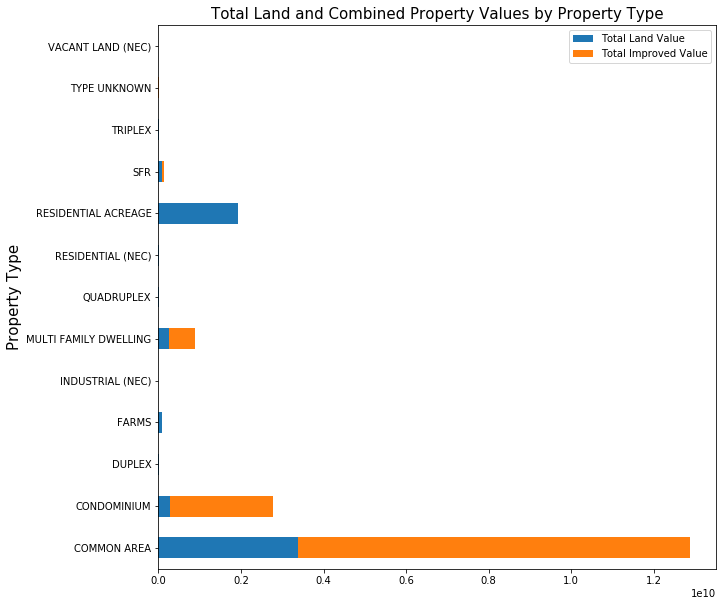

In [23]:
ax = df_property.groupby(['property_type'])['calculated_land_value', 
                                            'calculated_improved_value'].sum().plot.barh(figsize=(10,10), 
                                                                                         stacked=True)
ax.set_ylabel('Property Type', fontsize=15)
ax.set_title('Total Land and Combined Property Values by Property Type', fontsize=15)
ax.legend(('Total Land Value', 'Total Improved Value'))
;
plt.savefig(f'stacked_property_val_chart_{zipinput}.png')

In [24]:
# Pull Sales time series data from the ATTOM API
conn2 = http.client.HTTPSConnection("api.gateway.attomdata.com") 
conn2.request("GET",f"/propertyapi/v1.0.0/salestrend/snapshot?geoid=ZI{zipinput}&interval=yearly&startyear=1979&endyear={year}", headers=headers)
res2 = conn2.getresponse() 
data2 = res2.read() 

dict2 = json.loads(data2.decode("utf-8"))

In [25]:
price_series = defaultdict(list)          #creates dictionary that's empty made of lists


#Build list of properties & key data
for price in dict2['salestrends']:
    price_series['location'].append(price['location']['geoID'])
    price_series['year'].append(price['daterange']['start'])
    price_series['SF_count'].append(price['SalesTrend']['homesalecount'])
    price_series['AvgSalePrice'].append(price['SalesTrend']['avgsaleprice'])
    price_series['MedianSalePrice'].append(price['SalesTrend']['medsaleprice'])
df = pd.DataFrame(price_series)

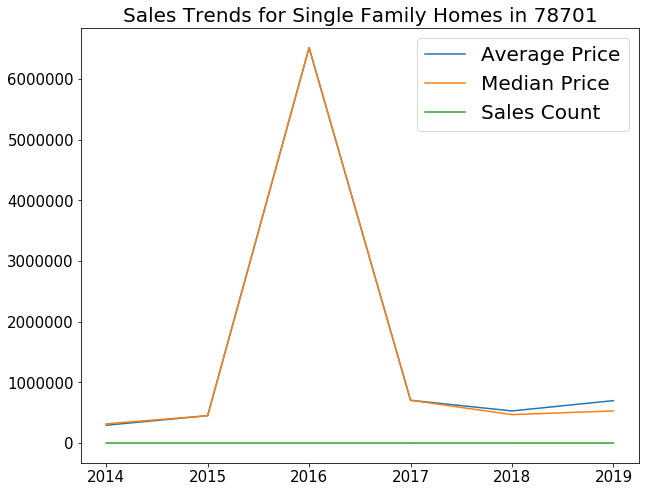

In [27]:

plt.figure(figsize=(10,8))
plt.title('Sales Trends for Single Family Homes in '+zipinput, fontsize=20)

for y_col in ['AvgSalePrice', 'MedianSalePrice', 'SF_count']:  
    plt.plot(df['year'], df[y_col])
    
plt.legend(labels=('Average Price', 'Median Price', 'Sales Count'), fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(f'sales_trends_graph_{zipinput}.png')
plt.show();
